# Pymaceuticals Inc.
---

### Analysis

- Infubinol, although being in one of the highest tumor volume groups ~(45-75), produced an outlier with a much lower tumor volume in the mid 30's.
- The heavier the mouse subject was in weight (g), the larger the average tumor volume (mm3) is.
- For the Capomulin drug regimen, we proved that the longer the subject was on the drug (timepoint), the lower the tumor volume was. And vice versa, there was a much higher spike in tumor volume for subjects with a lower timepoint, steadily rising from day 1 and peaking at 20 days. 
 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
medical_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")  

# Display the data table for preview
medical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice.
mouse_count = medical_data['Mouse ID'].nunique()
mouse_count

249

In [247]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = medical_data[medical_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

dup_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Print out exact duplicate mouse ID
dup_mouse_ids

array(['g989'], dtype=object)

In [248]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_combined = medical_data[medical_data['Mouse ID'].isin(dup_mouse_ids)]
dup_mice_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [249]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_dup_mice = medical_data.drop_duplicates(subset='Mouse ID', keep='first')

cleaned_dup_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [250]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_dup_mice["Mouse ID"])-1 # Subtract 1 due to index starting at 0

248

## Summary Statistics

In [252]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume').to_frame()
summary_stats['Median Tumor Volume'] = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Tumor Volume Variance'] = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Tumor Volume Std. Dev.'] = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['Tumor Volume Std. Err.'] = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [253]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_w_agg = medical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats_w_agg = summary_stats_w_agg.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_stats_w_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

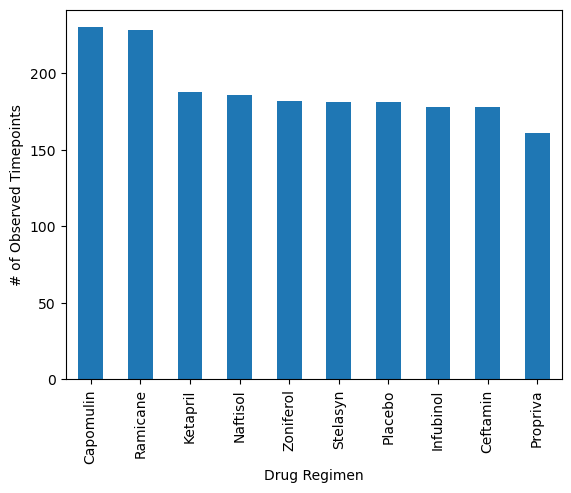

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#columns_to_plot = ['Mouse ID', 'Timepoints']
drug_counts = medical_data['Drug Regimen'].value_counts()

# Plot the bar chart using pandas .plot()
drug_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.show()

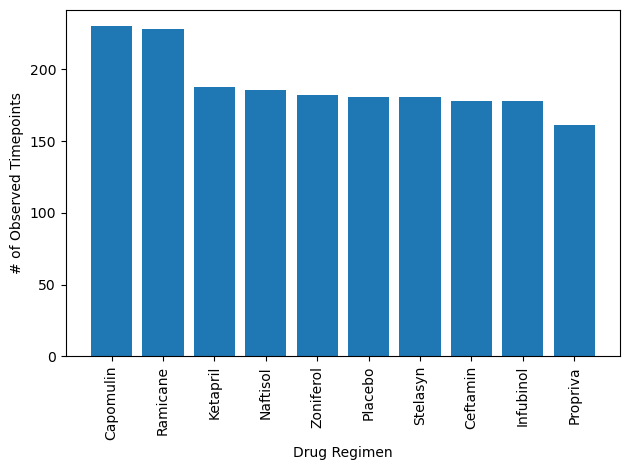

In [256]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_data = medical_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Extract drug regimens and counts from the grouped data
drug_regimens = grouped_data.index
row_counts = grouped_data.values

# Create the bar plot using pyplot's .bar()
plt.bar(drug_regimens, row_counts)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')

# Rotate x-axis labels vertical
plt.xticks(rotation='vertical')


# Show the plot
plt.tight_layout()
plt.show()

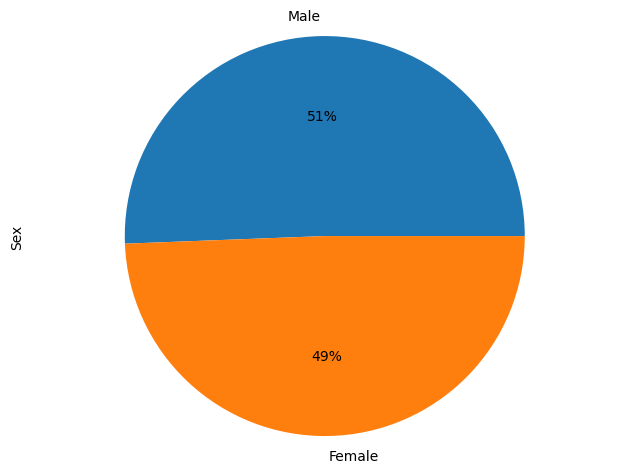

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = medical_data['Sex'].value_counts()

# Create the pie plot using Pandas' built-in plotting function
gender_counts.plot(kind='pie', autopct='%1.0f%%', startangle=0)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

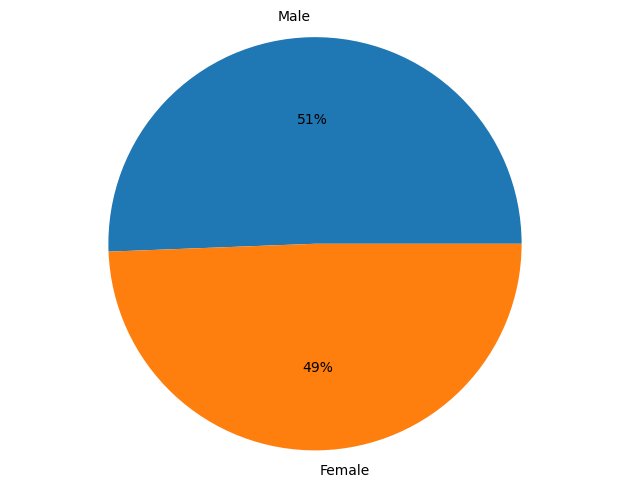

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()

# Create the pie plot using pyplot .pie()
ax.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.0f%%', startangle=0)

# Set aspect ratio to be equal so the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [243]:
# Export out medical_data df to an excel sheet
# medical_data.to_excel('medical_data.xlsx', index=False) 

In [263]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = medical_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(medical_data, last_timepoints, on=['Mouse ID', 'Timepoint'], how='right')

In [264]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for drug in drugs:
    # Filter the data for the current treatment
    drug_data = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset data to the list
    tumor_vol_data.append(drug_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
        
    if potential_outliers.empty:
        print(f"\n{drug}'s potential outliers: None")
    else:
        print(f"\n{drug}'s potential outliers: {potential_outliers}")
    print(f"IQR: {iqr}")


Capomulin's potential outliers: None
IQR: 7.781863460000004

Ramicane's potential outliers: None
IQR: 9.098536719999998

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR: 11.477135160000003

Ceftamin's potential outliers: None
IQR: 15.577752179999997


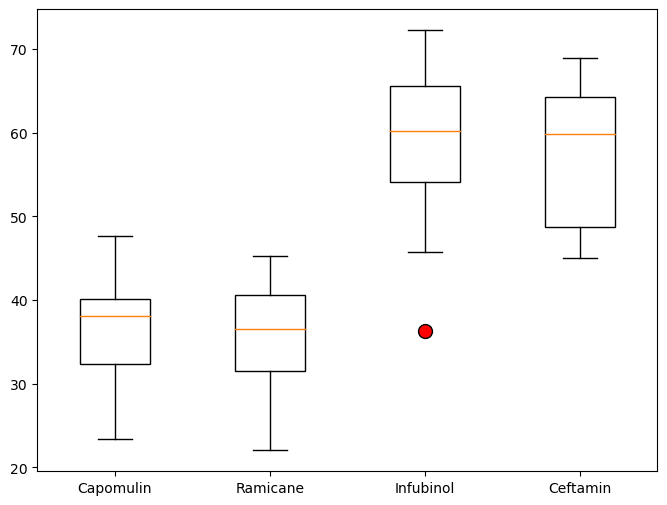

In [265]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure (width, height)

# Use the 'boxplot()' function to create the box plot
bp = plt.boxplot(tumor_vol_data, labels=drugs, patch_artist=True, boxprops=dict(facecolor='white'))

# Customize the outlier appearance
outlier_marker_style = dict(markerfacecolor='red', marker='o', markersize=10)
for box in bp['fliers']:
    box.set(**outlier_marker_style)
    
# Show the plot
plt.show()

## Line and Scatter Plots

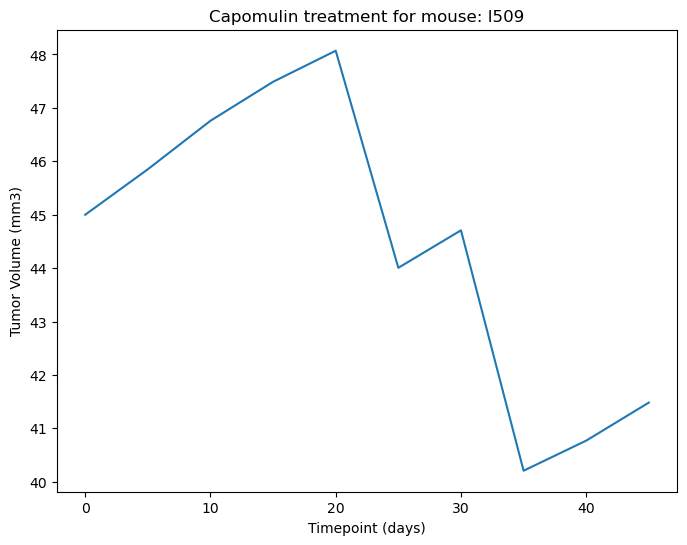

In [223]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = medical_data.loc[medical_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the filtered data (for example, 'mouse_1')
mouse_id = 'l509'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point for the chosen mouse
plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure (width, height)

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set plot labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment for mouse: {mouse_id}')

# Show the plot
plt.show()

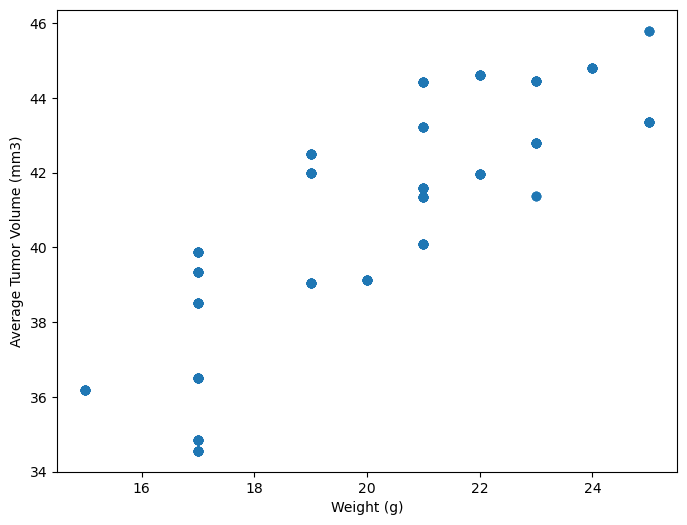

In [266]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data to include only mice treated with Capomulin
capomulin_data = medical_data.loc[medical_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average_tumor_volume DataFrame with the capomulin_data DataFrame
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('', '_average'))

# Create the scatter plot with mouse weight on the x-axis and the average tumor volume on the y-axis
plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure (width, height)

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], marker='o')

# Set plot labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


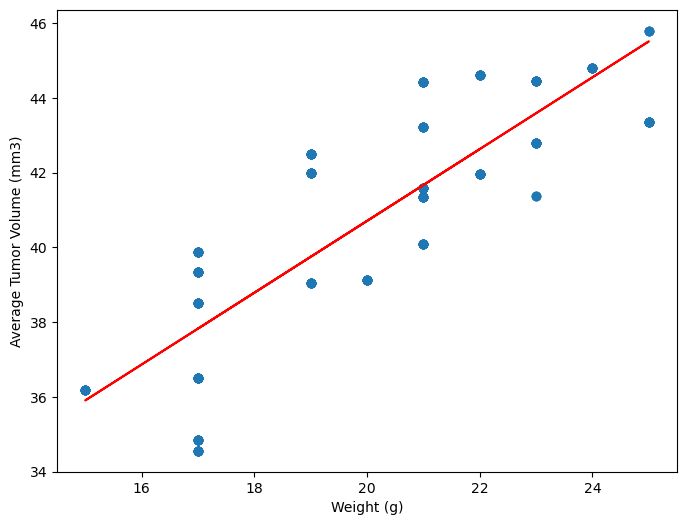

In [269]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, _ = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])

# Create the scatter plot with the regression line
plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure (width, height)

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], marker='o')

# Plot the regression line
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='r', label='Regression Line')

# Set plot labels and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()